# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **English**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 2nd, 23:00 h** 

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

The main topics of Laboratory 4 are:

**FirstPart: Template Matching and Image Descriptors**

    4.1) SSD and Normalized Cross-correlation for template matching

    4.2) HOG image descriptor for object (person) detection

**Second Part: Image matching**

    4.3) Recognition by correspondance, based on feature extraction (ORB)

In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 1 Template matching

**1.1** Given the image 'einstein.png' and the template image 'eye.png', detect the location of the template in the image comparing the use of:
- SSD distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

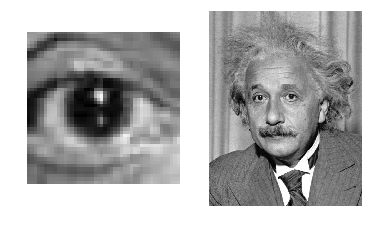

In [27]:
# Show the original image and the template image
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(1,2,1)
eye=io.imread('./images/eye.png')
plt.imshow(eye)
plt.axis('off')

plt.subplot(1,2,2)
einstein=io.imread('./images/einstein.png')
plt.imshow(einstein)
plt.axis('off')

plt.show()

Create a function for template matching applying SSD distance and normalized cross-correlation and display the results in the following format:
    
<img src="images_notebook/tm.png" width="400" height="120">

**Use titles in all figures to understand what is being displayed.**

Einstein info: (762, 595, 4) uint8 0 255
Eye info: (46, 46, 4) uint8 0 255


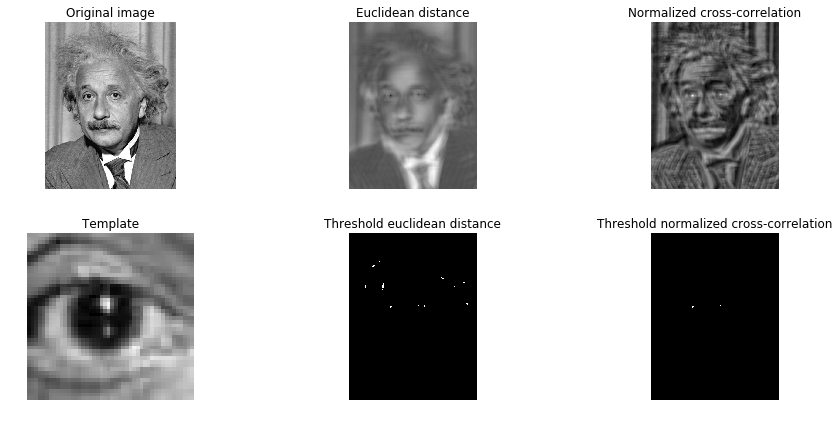

In [28]:
# Your solution here
from skimage.color import rgb2gray, rgba2rgb
from skimage import feature, img_as_float

# Calculates the euclidian distance between two images
def euclidean_distance(img, template):
    m_img, n_img = img.shape[0], img.shape[1]
    m_temp, n_temp = template.shape[0], template.shape[1]
    m, n = m_img - m_temp, n_img - n_temp
    
    distance = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            distance[i,j] = np.linalg.norm(img[i:i + m_temp, j:j + n_temp] - template)
            
    # Return the distance normalized
    return distance

# Calculates the normalized cross-correlation between two images
def normalized_x_correlation(img, template):
    return feature.match_template(img, template)

# Normalize image to range [0,1]
def normalize(img):
    minimum = np.min(img)
    maximum = np.max(img)
    return (img - minimum)/(maximum - minimum)

print("Einstein info:", einstein.shape, einstein.dtype, einstein.min(), einstein.max())
print("Eye info:", eye.shape, eye.dtype, eye.min(), eye.max())
# Convert images to grayscale
einstein_gray = rgb2gray(rgba2rgb(einstein))
eye_gray = rgb2gray(rgba2rgb(eye))

# Apply template matching and normalize to range [0,1]
euclidean = normalize(euclidean_distance(einstein_gray, eye_gray))
cross = normalize(normalized_x_correlation(einstein_gray, eye_gray))

# Apply thresholds
threshold = 0.7
t_euclidean = np.where(euclidean < 1-threshold, 1, 0) # euclidean < 1-threshold
t_cross = cross > threshold

# Show images
def show_images(m, n, imgs, labels):
    fig, axes = plt.subplots(m, n, figsize=(13, 6))
    ax = axes.ravel()
    cmap='gray'
    for i in range(m*n):
        ax[i].imshow(imgs[i], cmap)
        ax[i].set_title(labels[i])
        ax[i].axis('off')
        
    plt.tight_layout()
    plt.show()
    
show_images(2, 3,
            [einstein, euclidean, cross, eye, t_euclidean, t_cross], 
            ["Original image", "Euclidean distance", "Normalized cross-correlation",
             "Template", "Threshold euclidean distance", "Threshold normalized cross-correlation"])

**1.2** How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? 

Similarly to the previous case, please, visualize the euclidean distance and normalized cross-correlation images as well as the binarized (thresholded) images in the two cases.

**Note:** Use titles of the figures to explain what is displayed.


Read `einstein_br.png` and display the results on this image, using `eye.png` as template:

Einstein_br info: (762, 595) uint16 0 65535
(716, 549)


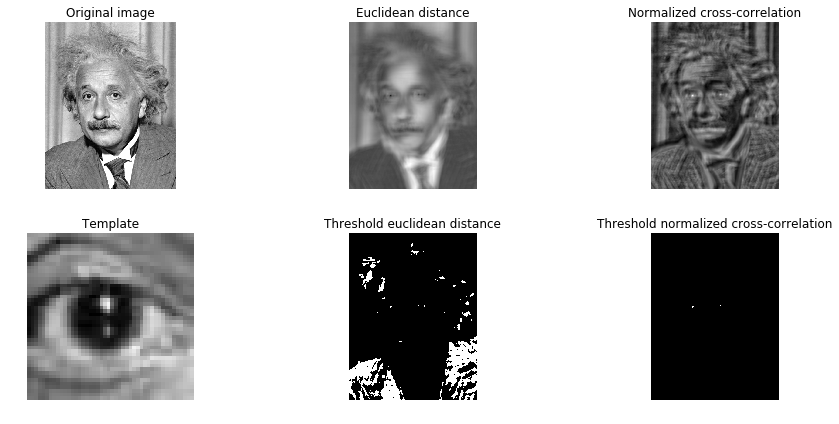

In [29]:
# Your solution here
einstein_br = io.imread('./images/einstein_br.png')
print("Einstein_br info:", einstein_br.shape, einstein_br.dtype, einstein_br.min(), einstein_br.max())
einstein_br = normalize(einstein_br)

# Apply template matching
euclidean = normalize(euclidean_distance(einstein_br, eye_gray))
print(euclidean.shape)
cross = normalize(normalized_x_correlation(einstein_br, eye_gray))

# Apply thresholds
threshold = 0.7
t_euclidean = np.where(euclidean < 1-threshold, 1, 0) # euclidean < 1-threshold
t_cross = cross > threshold

show_images(2, 3,
            [einstein_br, euclidean, cross, eye, t_euclidean, t_cross], 
            ["Original image", "Euclidean distance", "Normalized cross-correlation",
             "Template", "Threshold euclidean distance", "Threshold normalized cross-correlation"])

Print the minimum SSD and the maximum Normalized Cross-Correlation (NCC)

In [30]:
# Your solution here
# Apply template matching
euclidean = euclidean_distance(einstein_br, eye_gray)
cross = normalized_x_correlation(einstein_br, eye_gray)
print("Minimum SSD:", euclidean.min())
print("Maximum NCC:", cross.max())

Minimum SSD: 3.0698531963845404
Maximum NCC: 0.9768232838639532


Read `einstein_mask.png` and display the results on this image, using the `eye.png` template:

Einstein_mask info: (762, 595) uint16 0 65535


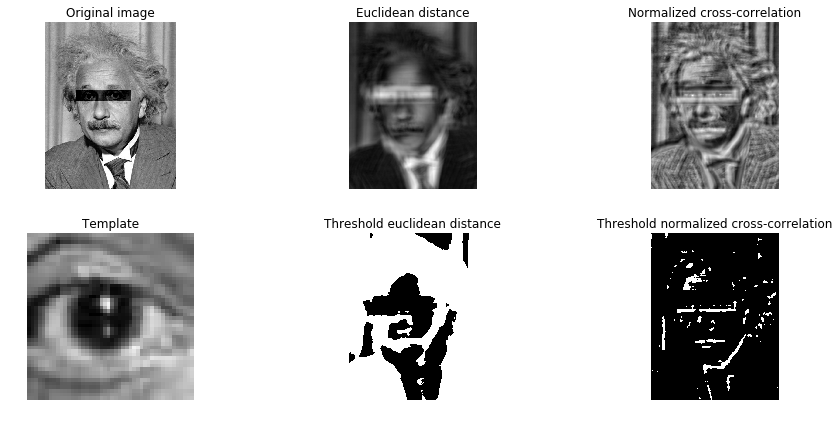

In [31]:
# Your solution here
einstein_mask = io.imread('./images/einstein_mask.png')
print("Einstein_mask info:", einstein_mask.shape, einstein_mask.dtype, einstein_mask.min(), einstein_mask.max())
einstein_mask = img_as_float(einstein_mask)

euclidean = normalize(euclidean_distance(einstein_mask, eye_gray))
cross = normalize(normalized_x_correlation(einstein_mask, eye_gray))

# Apply thresholds
threshold = 0.7
t_euclidean = np.where(euclidean < 1-threshold, 1, 0) # euclidean < 1-threshold
t_cross = cross > threshold

show_images(2, 3,
            [einstein_mask, euclidean, cross, eye, t_euclidean, t_cross], 
            ["Original image", "Euclidean distance", "Normalized cross-correlation",
             "Template", "Threshold euclidean distance", "Threshold normalized cross-correlation"])

Print the minimum SSD and the maximum NCC

In [32]:
# Your solution here
euclidean = euclidean_distance(einstein_mask, eye_gray)
cross = normalized_x_correlation(einstein_mask, eye_gray)
print("Minimum SSD:", euclidean.min())
print("Maximum NCC:", cross.max())

Minimum SSD: 8.27263708944657
Maximum NCC: 0.61663627393373


What are the distances between the template and the image around the eyes of the image? 

**R:** The distances between the images increased because the image with a black tile over the eyes is different.

In [33]:
# Your solution here
# SSD
euclidean = euclidean_distance(einstein_gray, eye_gray)
euclidean_mask = euclidean_distance(einstein_mask, eye_gray)
SSD_distance = euclidean_mask - euclidean
print("SSD_distance min:", SSD_distance.min(),"max:", SSD_distance.max())

# NCC
cross = normalized_x_correlation(einstein_gray, eye_gray)
cross_mask = normalized_x_correlation(einstein_mask, eye_gray)
NCC_distance = cross_mask - cross
print("NCC_distance min:", NCC_distance.min(), "max:", NCC_distance.max())

SSD_distance min: -0.4485818086496476 max: 17.38454159684491
NCC_distance min: -0.5259636045333216 max: 0.673042341542466


Comment the template matching process:
* Is the algorithms affected by contrast changes in the image?
* How do metrics (i.e. minimum euclidean distance and maximum NCC) change in all previous cases? Is there a big difference among these values?
* What parameters it has and which measure for image comparisons works better.

In [34]:
# Your solution here

**R:** The SSD is affected by contrast changes, but the NCC is not affected.
Euclidian's minimun has increases at the brighter image and more at the image with black mask. <br>
At the brighter image, NCC's maximum has changed a little but still matches the eyes correctly.
At the image with black mask, NCC's maximum has changed and the algorithm can't find the eyes. <br>
In order to apply the threshold with the same value for both algortihms, was needed to normalize both distances to the same scale [0,1].

**1.3** How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the `eye_br.png` template.

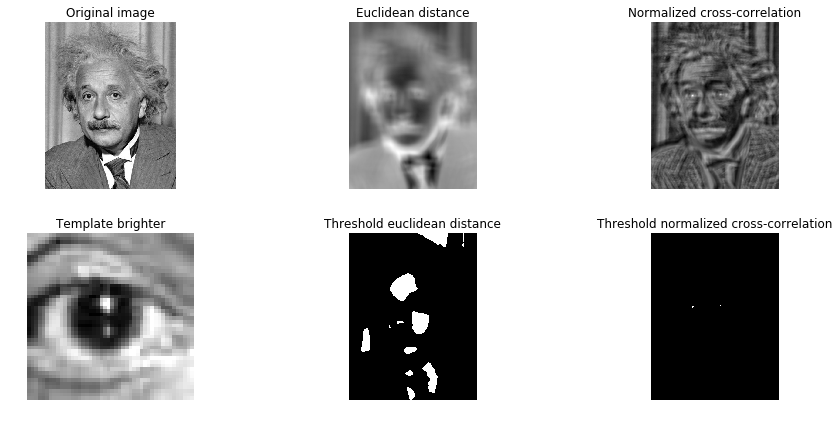

In [35]:
# Your solution here
eye_br = io.imread('./images/eye_br.png')

euclidean = normalize(euclidean_distance(einstein_gray, eye_br))
cross = normalize(normalized_x_correlation(einstein_gray, eye_br))

# Apply thresholds
threshold = 0.7
t_euclidean = np.where(euclidean < 1-threshold, 1, 0) # euclidean < 1-threshold
t_cross = cross > threshold

show_images(2, 3,
            [einstein_gray, euclidean, cross, eye_br, t_euclidean, t_cross], 
            ["Original image", "Euclidean distance", "Normalized cross-correlation",
             "Template brighter", "Threshold euclidean distance", "Threshold normalized cross-correlation"])

**R:** The SSD is affected by contrast changes at the template, but the NCC is not affected.

Check how the result changes if the template is rotated.

Visualize the template and its rotation by 2º, 5º, 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.

**Help:** use the function rotate() in skimage.transform

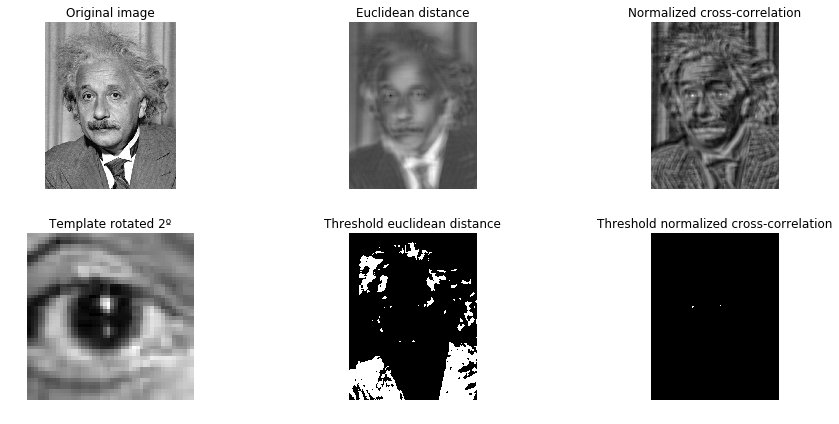

In [36]:
# Your solution here
from skimage.transform import rotate
eye_gray2 = rotate(eye_gray, 2) #, resize=True, cval=1)

# 2º
euclidean = normalize(euclidean_distance(einstein_gray, eye_gray2))
cross = normalize(normalized_x_correlation(einstein_gray, eye_gray2))

# Apply thresholds
threshold = 0.7
t_euclidean = np.where(euclidean < 1-threshold, 1, 0) # euclidean < 1-threshold
t_cross = cross > threshold

show_images(2, 3,
            [einstein_gray, euclidean, cross, eye_gray, t_euclidean, t_cross], 
            ["Original image", "Euclidean distance", "Normalized cross-correlation",
             "Template rotated 2º", "Threshold euclidean distance", "Threshold normalized cross-correlation"])

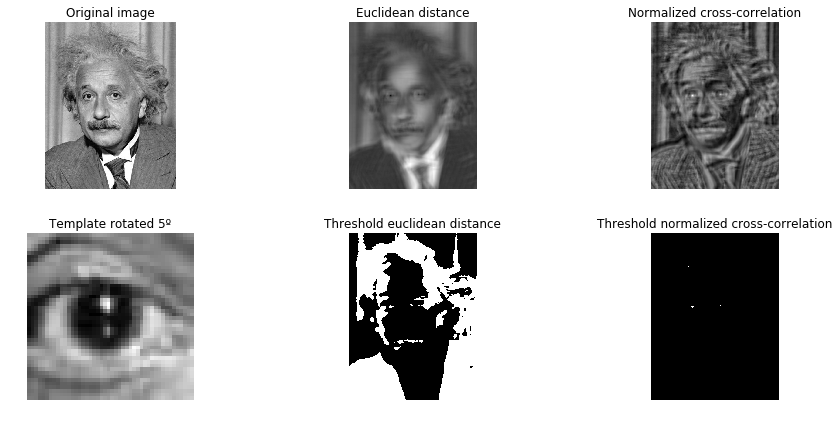

In [37]:
# 5º
eye_gray5 = rotate (eye_gray, 5) #, resize=True, cval=1)
euclidean = normalize(euclidean_distance(einstein_gray, eye_gray5))
cross = normalize(normalized_x_correlation(einstein_gray, eye_gray5))

# Apply thresholds
threshold = 0.7
t_euclidean = np.where(euclidean < 1-threshold, 1, 0) # euclidean < 1-threshold
t_cross = cross > threshold

show_images(2, 3,
            [einstein_gray, euclidean, cross, eye_gray, t_euclidean, t_cross], 
            ["Original image", "Euclidean distance", "Normalized cross-correlation",
             "Template rotated 5º", "Threshold euclidean distance", "Threshold normalized cross-correlation"])

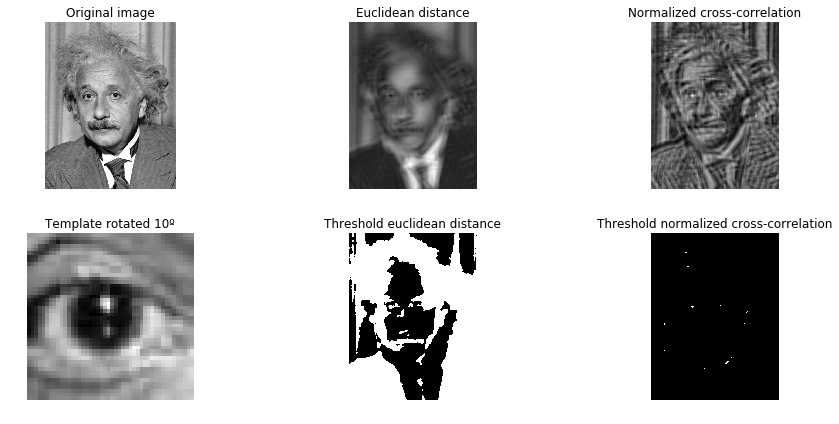

In [38]:
# 10º
eye_gray10 = rotate (eye_gray, 10) #, resize=True, cval=1)
euclidean = normalize(euclidean_distance(einstein_gray, eye_gray10))
cross = normalize(normalized_x_correlation(einstein_gray, eye_gray10))

# Apply thresholds
threshold = 0.7
t_euclidean = np.where(euclidean < 1-threshold, 1, 0) # euclidean < 1-threshold
t_cross = cross > threshold

show_images(2, 3,
            [einstein_gray, euclidean, cross, eye_gray, t_euclidean, t_cross], 
            ["Original image", "Euclidean distance", "Normalized cross-correlation",
             "Template rotated 10º", "Threshold euclidean distance", "Threshold normalized cross-correlation"])

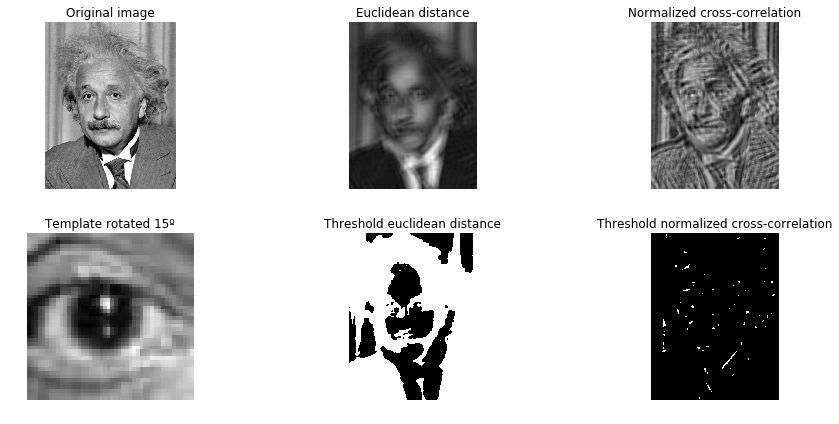

In [39]:
# 15º
eye_gray15 = rotate (eye_gray, 15) #, resize=True, cval=1)
euclidean = normalize(euclidean_distance(einstein_gray, eye_gray15))
cross = normalize(normalized_x_correlation(einstein_gray, eye_gray15))

# Apply thresholds
threshold = 0.7
t_euclidean = np.where(euclidean < 1-threshold, 1, 0) # euclidean < 1-threshold
t_cross = cross > threshold

show_images(2, 3,
            [einstein_gray, euclidean, cross, eye_gray, t_euclidean, t_cross], 
            ["Original image", "Euclidean distance", "Normalized cross-correlation",
             "Template rotated 15º", "Threshold euclidean distance", "Threshold normalized cross-correlation"])

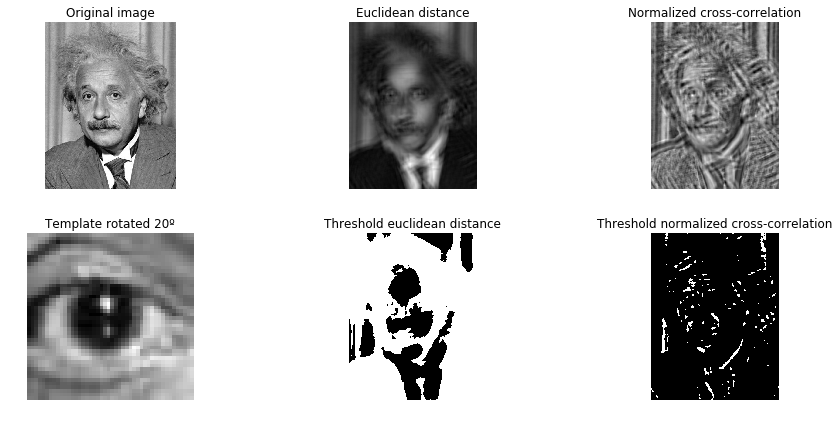

In [40]:
# 20º
eye_gray20 = rotate (eye_gray, 20) #, resize=True, cval=1)
euclidean = normalize(euclidean_distance(einstein_gray, eye_gray20))
cross = normalize(normalized_x_correlation(einstein_gray, eye_gray20))

# Apply thresholds
threshold = 0.7
t_euclidean = np.where(euclidean < 1-threshold, 1, 0) # euclidean < 1-threshold
t_cross = cross > threshold

show_images(2, 3,
            [einstein_gray, euclidean, cross, eye_gray, t_euclidean, t_cross], 
            ["Original image", "Euclidean distance", "Normalized cross-correlation",
             "Template rotated 20º", "Threshold euclidean distance", "Threshold normalized cross-correlation"])

Comment the template matching process:
* Please, explain briefly the algorithm, including advantages and disadvantage
* Is the algorithms affected by contrast changes in the tempate image?
* What parameters it has and which measure for image comparisons works better.

In [41]:
# Your solution here

**R:** Both distances use a sliding-window over the image to calculate the distance between two images. <br> The SSD distance calculate the norm of the difference between two vectors (windows). <br> On other hand NCC, calculates a normalized correlation between two vectors (windows) <br>
The points with more distance is showed as white points.

**R:** The SSD is affected by contrast changes at the template, but the NCC is not affected.

**R:** In order to apply the threshold with the same value for both algortihms, was needed to normalize both distances to the same scale [0,1].

# 2 Histogram of Oriented Gradients

In this section we will treat the following topic: HOG image descriptor. Application to person detection.

The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image `person_template.png` and the folder `/images/TestPersonImages/`, apply the HOG descriptor in order to detect where there is a person in the images. To this purpose, apply the "sliding window" technique. We use images from GRAZ 01 data from [INRIA datasets](http://pascal.inrialpes.fr/data/human/).

**2.1.** Read the template (`person_template.png`), obtain its HOG descriptor (with the optimal parameters) and visualize it.

Help: the HOG detector function is in the skimage.feature library ([Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)).

(129, 49, 4)


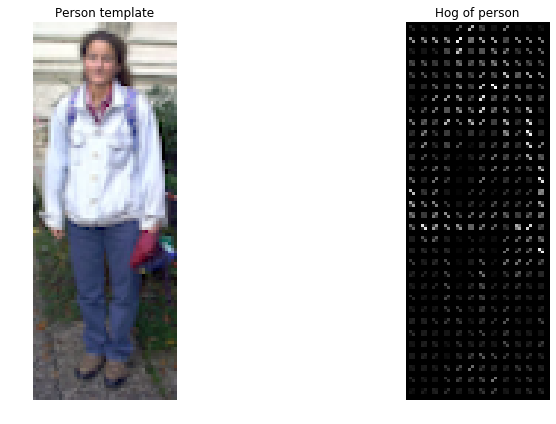

In [42]:
from skimage.feature import hog

# We get the image
person_template = io.imread("./images/person_template.bmp")

print(person_template.shape)
# And get the descriptor 
fd_person, hog_person = hog(person_template, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)

# To visualize the images
show_images(1, 2,
            [person_template, hog_person], 
            ["Person template", "Hog of person"])

**2.2.** Apply the HOG descriptor on the complete set of images for person detection.

a) Read images from the folder "TestPersonImages", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the person template. 

b) Visualize the location in the image that is the most similar to the person template using the distance between the template and test image descriptors.

Display the results of every person detection following this format:

<img src="images_notebook/hog.png" width="800" height="100">

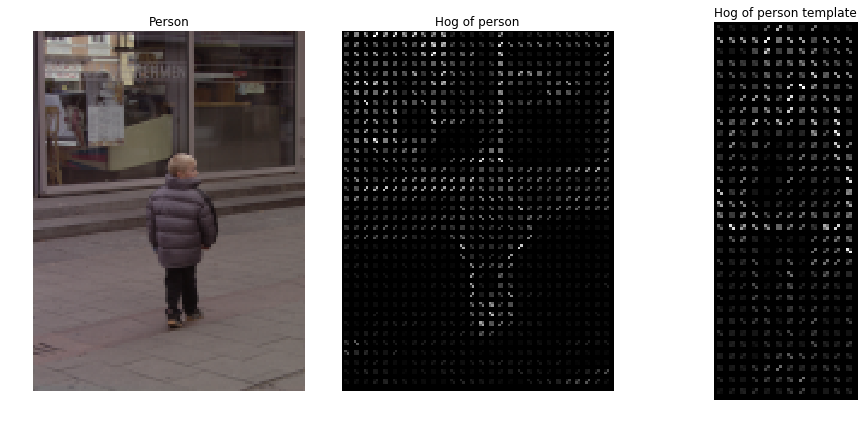

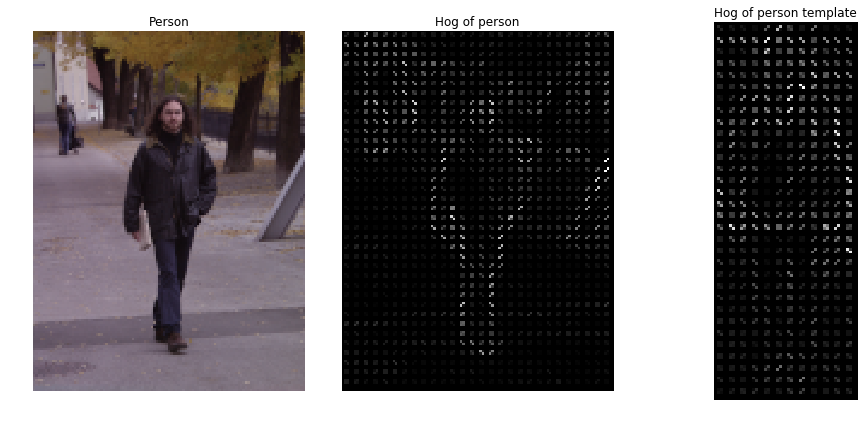

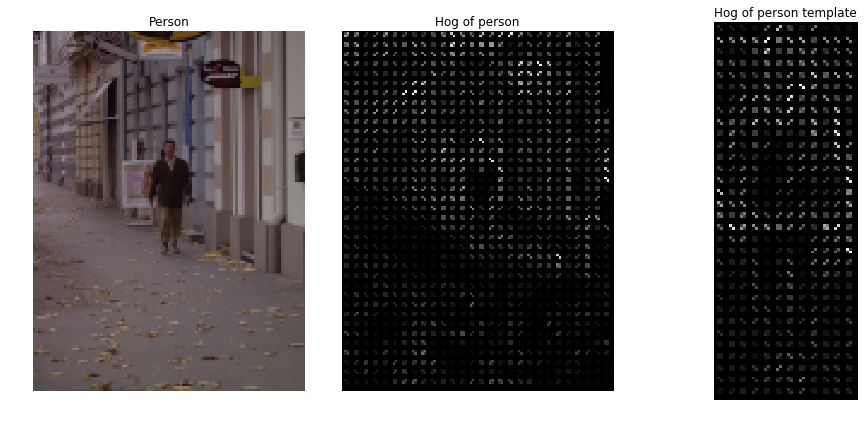

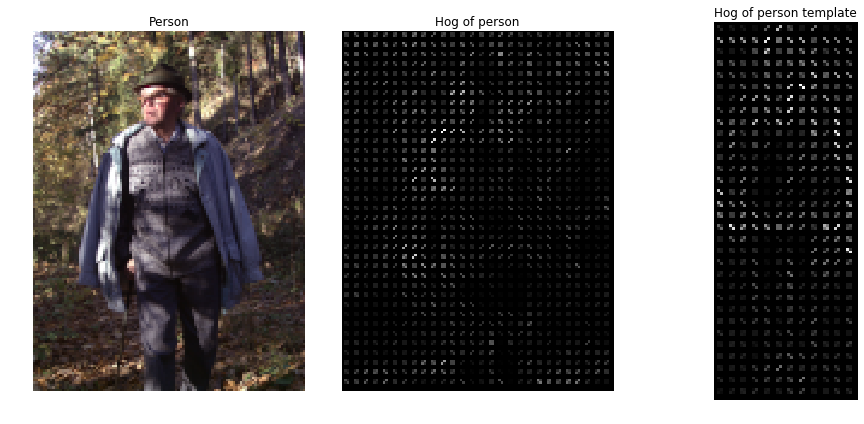

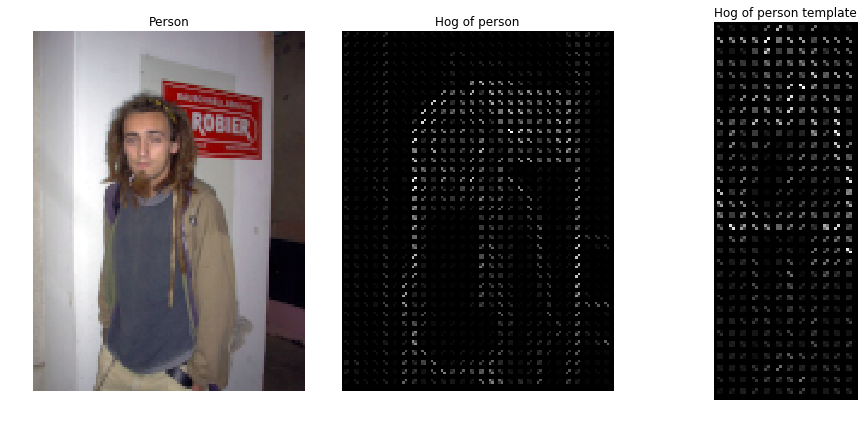

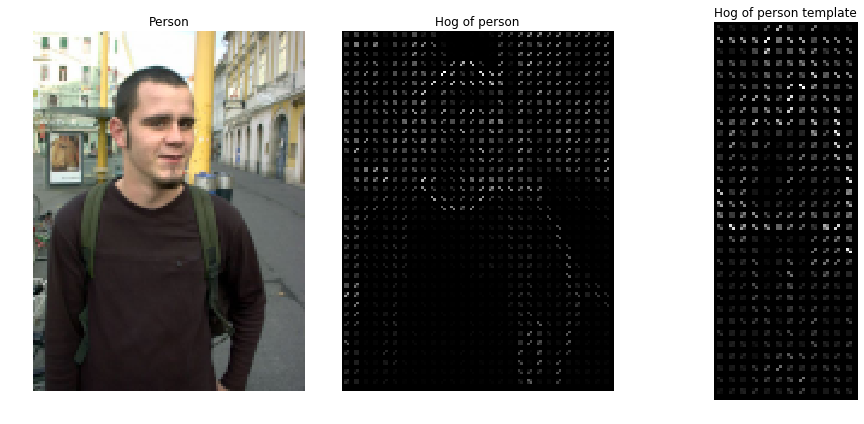

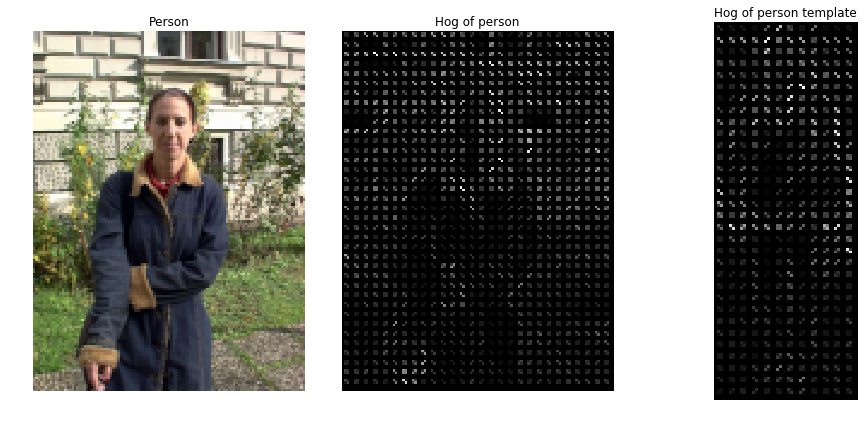

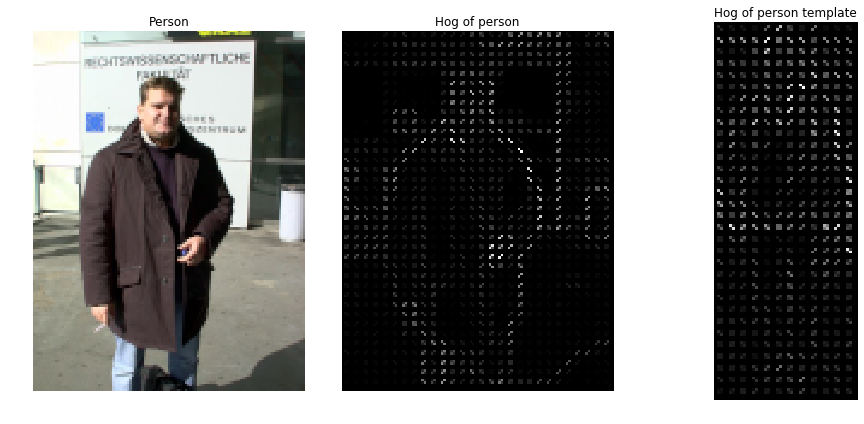

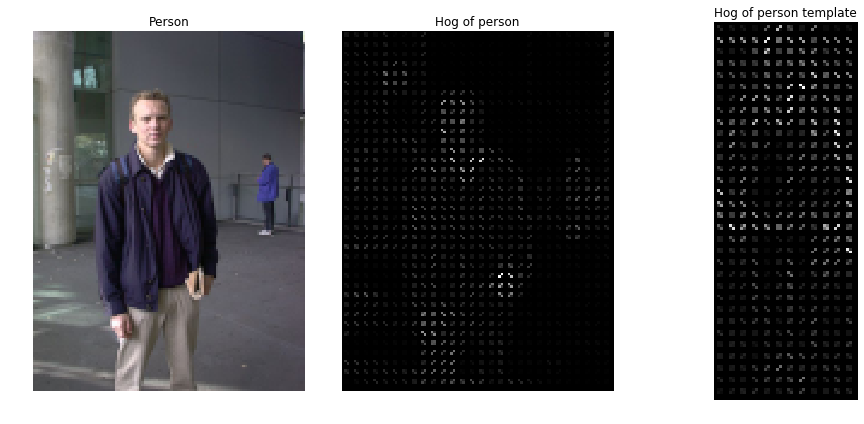

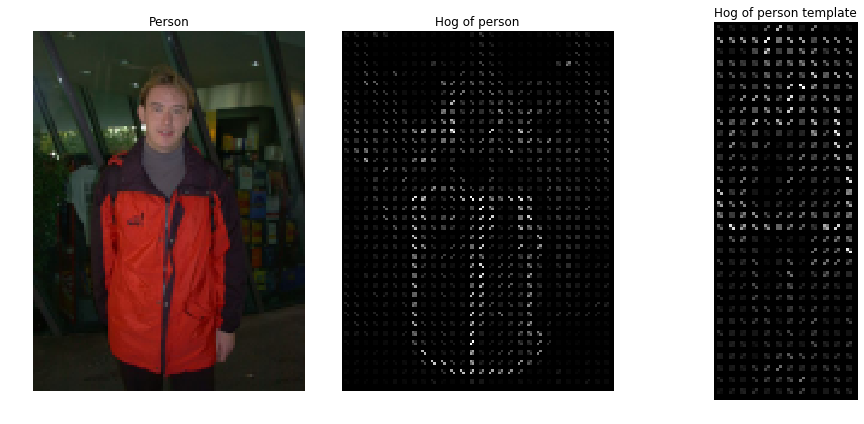

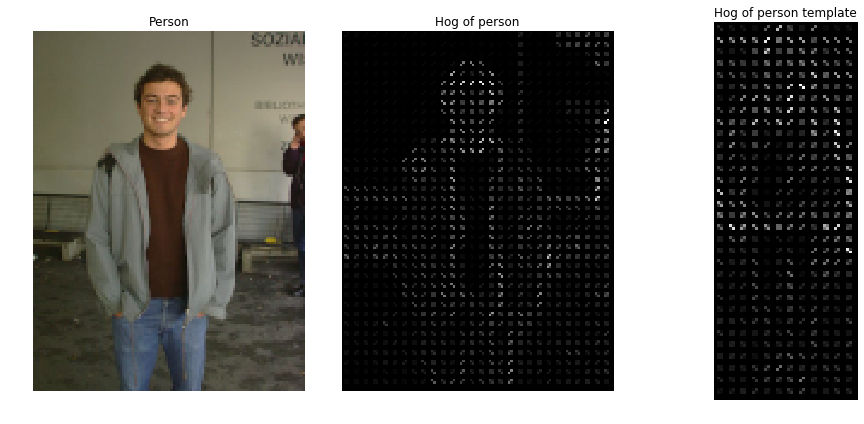

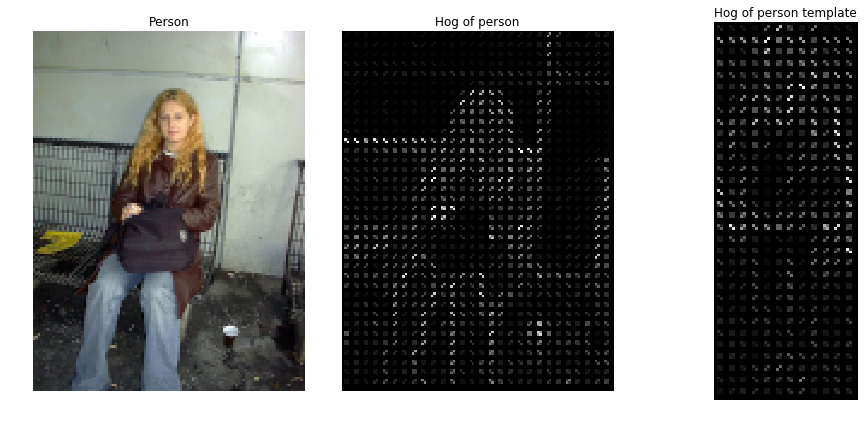

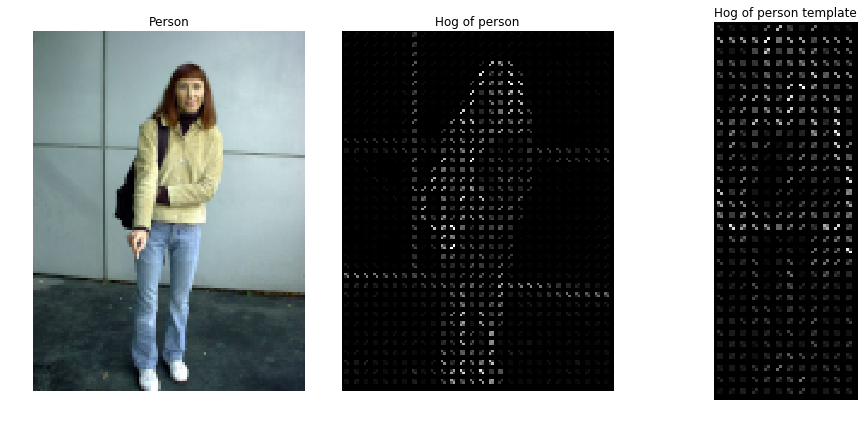

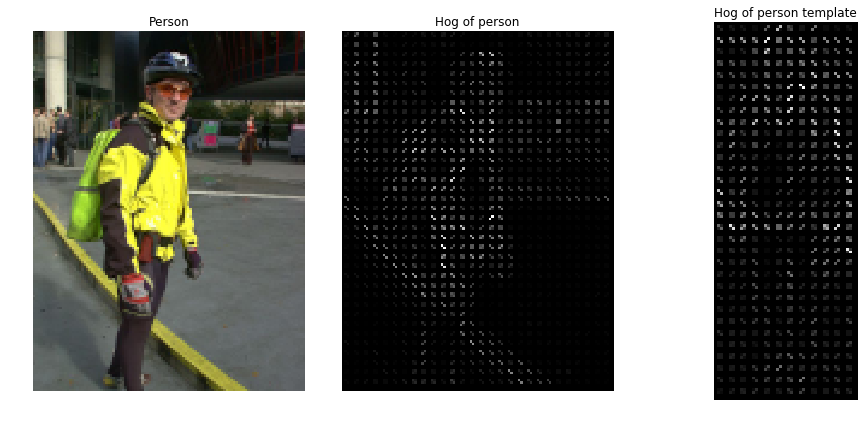

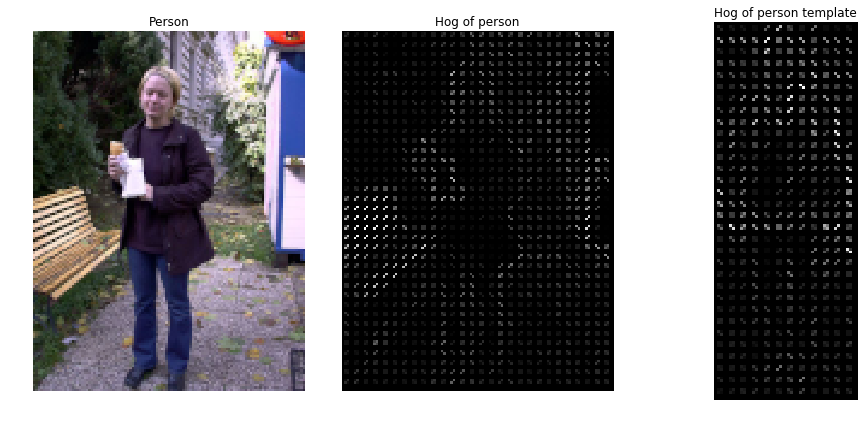

In [43]:
# A
people = io.collection.ImageCollection('images/TestPersonImages/*.bmp')

# For every image
for i in people:
    # We extract the hog descriptor
    fd_i, hog_i = hog(i, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)
    # And visualized it with hog of person template to compare them
    show_images(1, 3,
            [i, hog_i, hog_person], 
            ["Person", "Hog of person", "Hog of person template"])


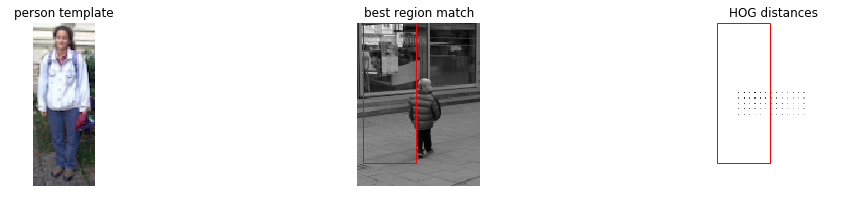

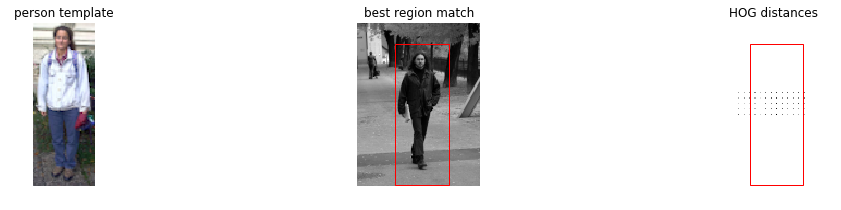

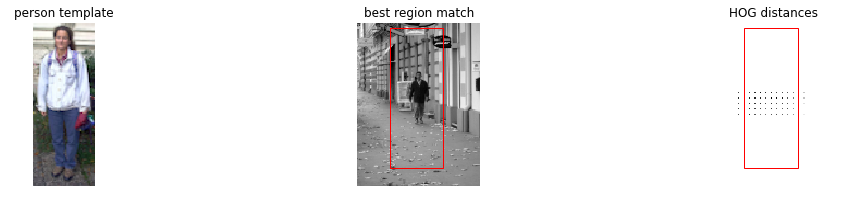

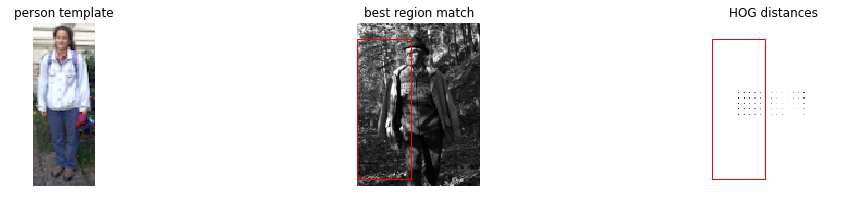

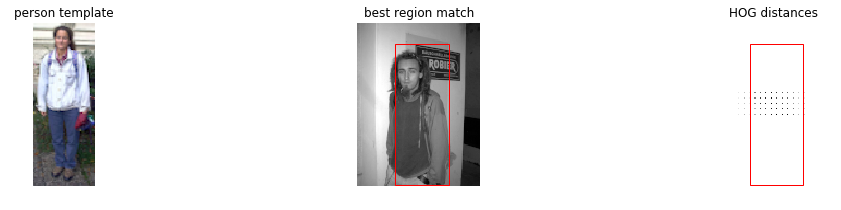

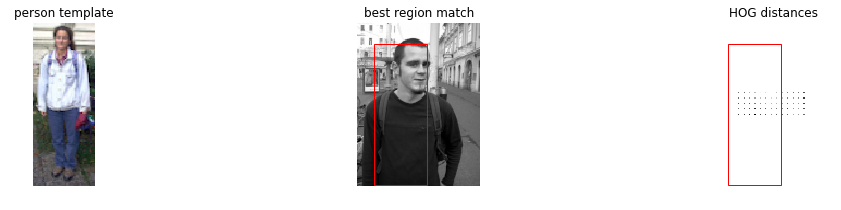

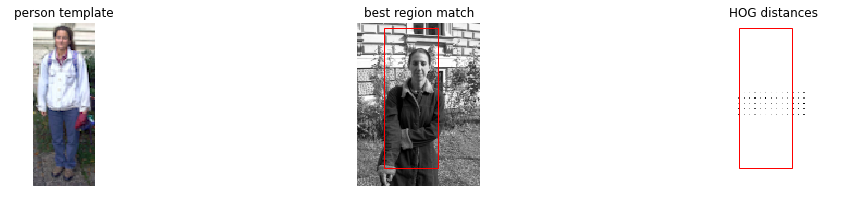

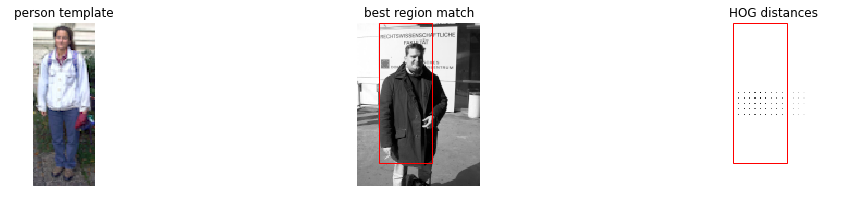

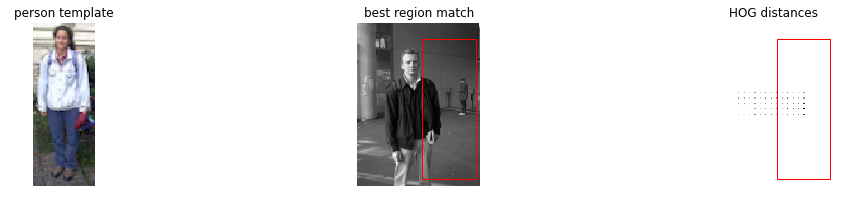

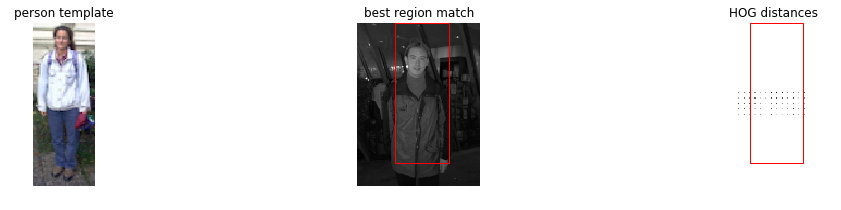

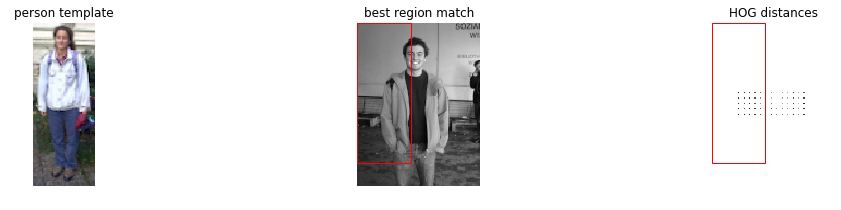

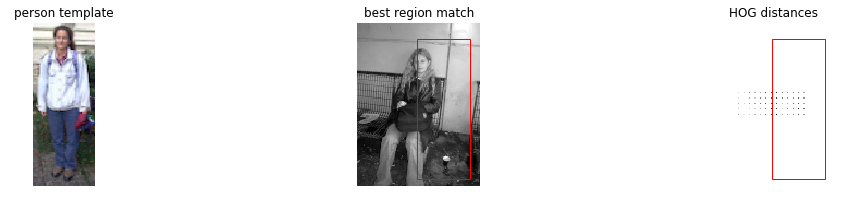

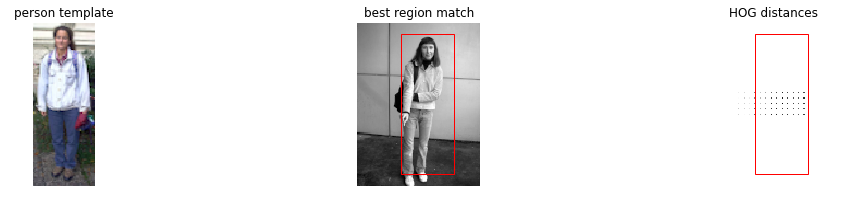

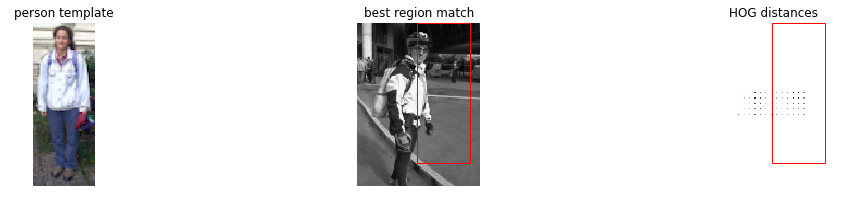

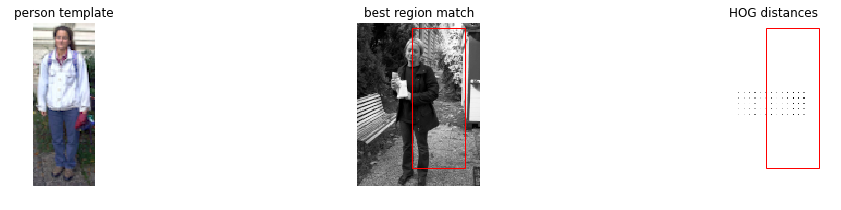

In [44]:
#B

# Function to visualize the images
def visualize_people(person,im,im_result,pos_x,pos_y,wperson, hperson):
        fig=plt.figure(figsize=(18,3))
        ax1=plt.subplot(1,3,1)
        ax2=plt.subplot(1,3,2)
        ax3=plt.subplot(1,3,3, sharex=ax2, sharey=ax2)
        ax1.axis('off')
        ax1.set_title('person template')
        ax1.imshow(person, cmap='gray')
        ax2.set_title('best region match')
        ax2.axis('off')
        ax2.imshow(im, cmap='gray')
        ax3.set_title('HOG distances')
        ax3.axis('off')
        ax3.imshow(im_result, cmap='gray')
        rect2 = plt.Rectangle((pos_x-wperson/2, pos_y-hperson/2), wperson, hperson, edgecolor='r', facecolor='none')
        rect3 = plt.Rectangle((pos_x-wperson/2, pos_y-hperson/2), wperson, hperson, edgecolor='r', facecolor='none')
        ax2.add_patch(rect2)
        ax3.add_patch(rect3)

        plt.show()

# We extract the descriptor and shape of the image template        
fd_person, hog_person = hog(person_template, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)
hperson = person_template.shape[0]
wperson = person_template.shape[1]

# For every image of the colection of people
people = io.collection.ImageCollection('images/TestPersonImages/*.bmp')
        
for im in people:
    
    # We convert the image
    im = rgb2gray(im)
    
    # And Inicialize a matrix with the image shape
    im_result=np.zeros((im.shape))
    im_result2=np.ones((im.shape))*np.inf
    height = im.shape[0]
    width=im.shape[1]

    # Now we find the region using the distance between the template and test image descriptors
    for i in range(0,height-hperson,5):
        for j in range(0,width-wperson,5):
            region = im[i:i+hperson, j:j+wperson]
            fd_region, hog_region = hog(region, orientations=8, pixels_per_cell=(4, 4), 
                                        cells_per_block=(2, 2), visualize=True)

            im_result[i+round(hperson/2),j+round(wperson/2)]=np.dot(fd_person,fd_region)
            im_result2[i+round(hperson/2),j+round(wperson/2)]=np.linalg.norm(fd_person-fd_region)

    ij = np.unravel_index(np.argmax(im_result), im_result.shape)
    pos_x = ij[::-1][0]
    pos_y = ij[::-1][1]
    ij2 = np.unravel_index(np.argmin(im_result2), im_result.shape)
    pos_x2 = ij2[::-1][0] 
    pos_y2 = ij2[::-1][1]

    # Finally, we visualize the images
    visualize_people(person_template, im, im_result2,  pos_x2,  pos_y2,  wperson, hperson)


What is the dimension of your HOG descriptor? Explain it.

In [45]:
print(np.size(hog_person, 0))
print(np.size(hog_person, 1))

129
49


*R:* The hog descriptor of the template person is a bidimensional matrix of 129x49, where in each position there are values x, y of a bidimensional graphic. 

Count on how many images were the persons detected correctly and discuss the failures.
What do you think can be the reasons for the failures?

*R:* The images wich haven't dectected persons correctly are:
- 1rst
- 4th
- 6th
- 9th
- 11th
- 12th 
- 14th
- 15th 

Failures in the descriptor could occur because the background of the image has very marked gradient directions that generate confusion in the comparison.

Test several values of the parameters (``orientations``, ``pixels_per_cell``, ``cells_per_block``) to show which are the optimal values for the person detection problem.

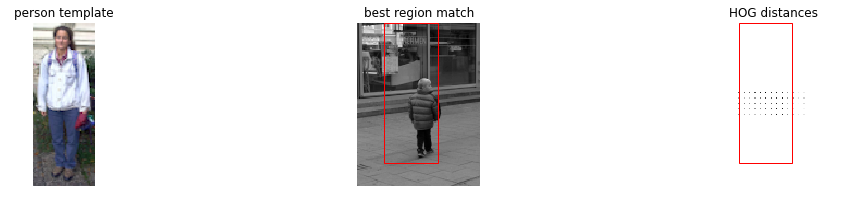

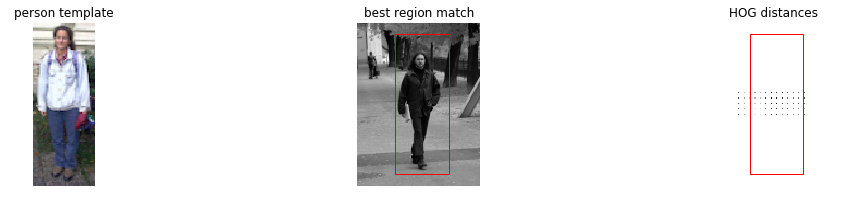

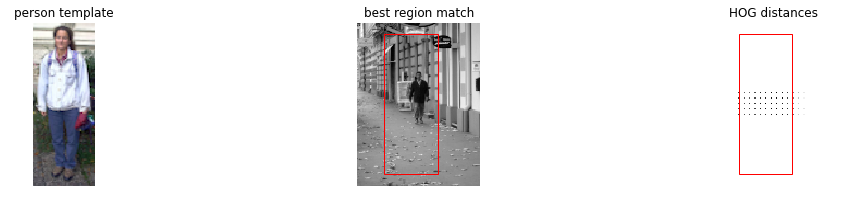

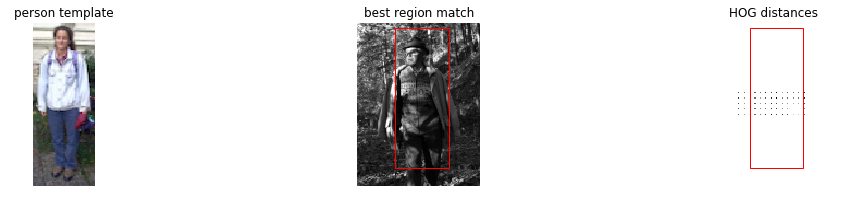

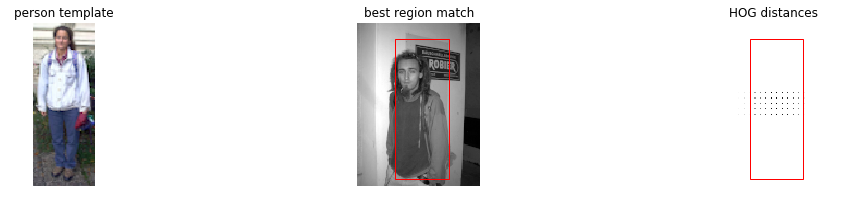

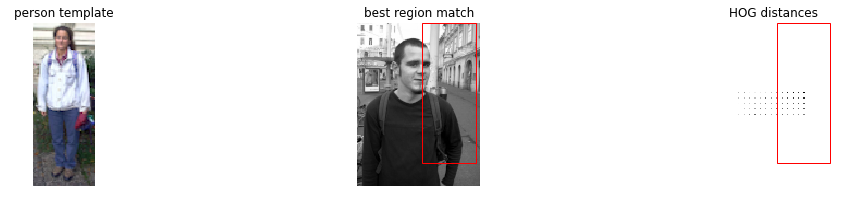

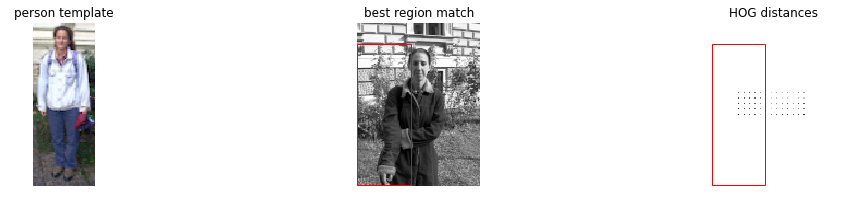

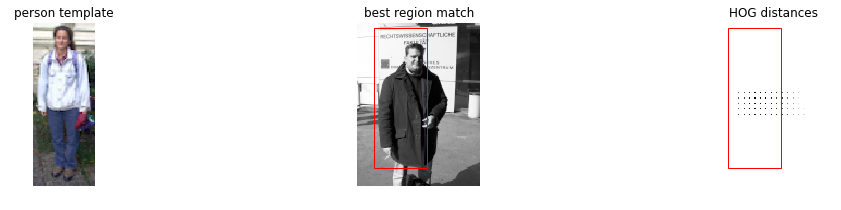

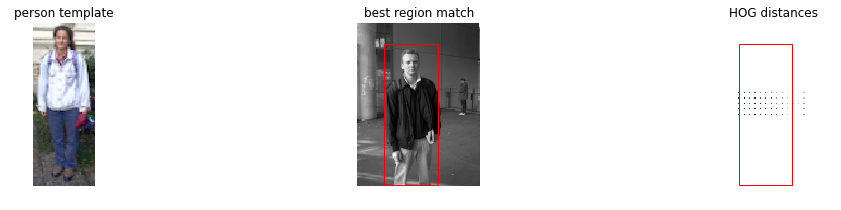

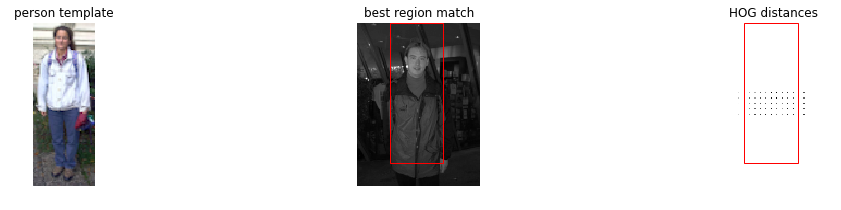

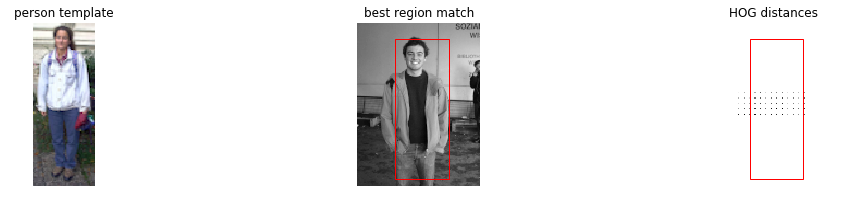

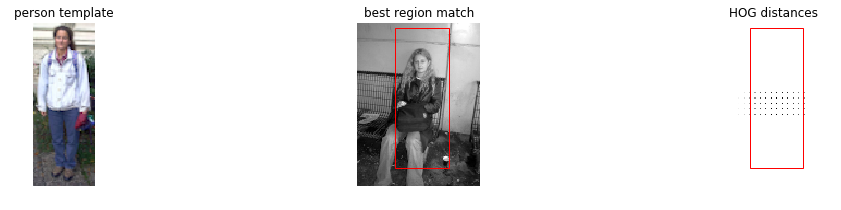

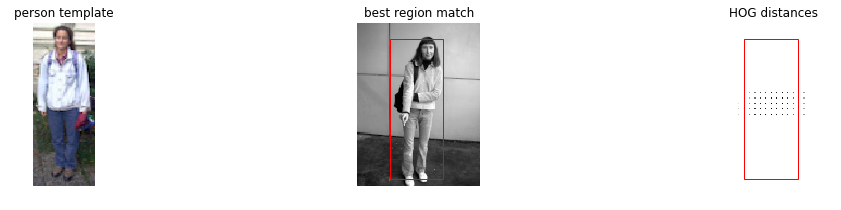

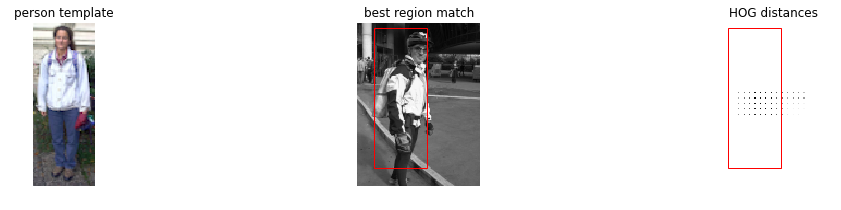

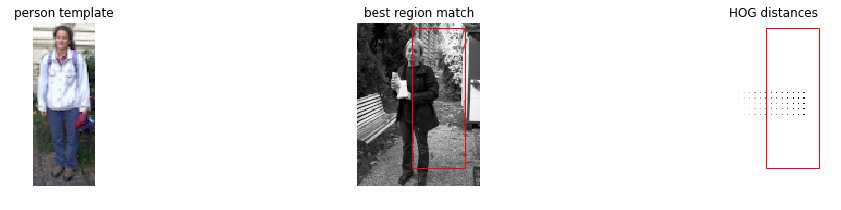

In [54]:
# Let's try with bigger numbers
 
# Changes    
fd_person, hog_person = hog(person_template, orientations=16, pixels_per_cell=(8, 8), cells_per_block=(4, 4), visualize=True)
hperson = person_template.shape[0]
wperson = person_template.shape[1]

people = io.collection.ImageCollection('images/TestPersonImages/*.bmp')
        
for im in people:
    
    im = rgb2gray(im)
    
    im_result=np.zeros((im.shape))
    im_result2=np.ones((im.shape))*np.inf
    height = im.shape[0]
    width=im.shape[1]

    for i in range(0,height-hperson,5):
        for j in range(0,width-wperson,5):
            region = im[i:i+hperson, j:j+wperson]
            
            # Changes
            fd_region, hog_region = hog(region, orientations=16, pixels_per_cell=(8, 8), 
                                        cells_per_block=(4, 4), visualize=True)

            im_result[i+round(hperson/2),j+round(wperson/2)]=np.dot(fd_person,fd_region)
            im_result2[i+round(hperson/2),j+round(wperson/2)]=np.linalg.norm(fd_person-fd_region)

    ij = np.unravel_index(np.argmax(im_result), im_result.shape)
    pos_x = ij[::-1][0]
    pos_y = ij[::-1][1]
    ij2 = np.unravel_index(np.argmin(im_result2), im_result.shape)
    pos_x2 = ij2[::-1][0] 
    pos_y2 = ij2[::-1][1]

    visualize_people(person_template, im, im_result2,  pos_x2,  pos_y2,  wperson, hperson)

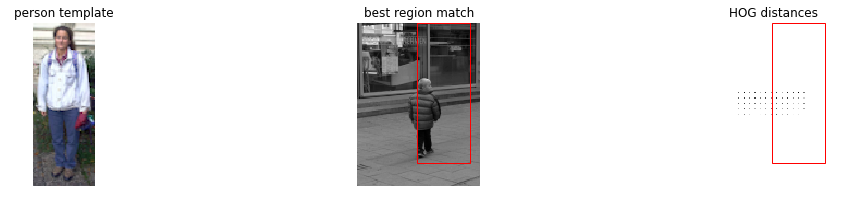

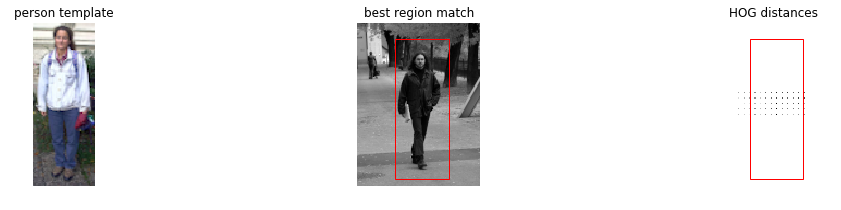

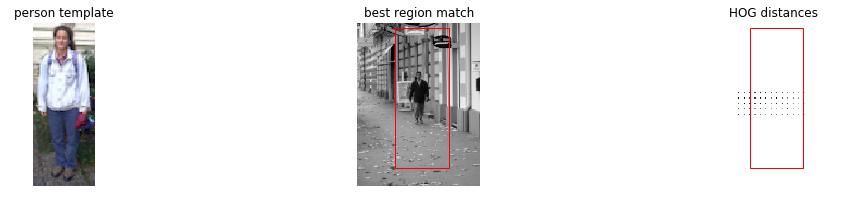

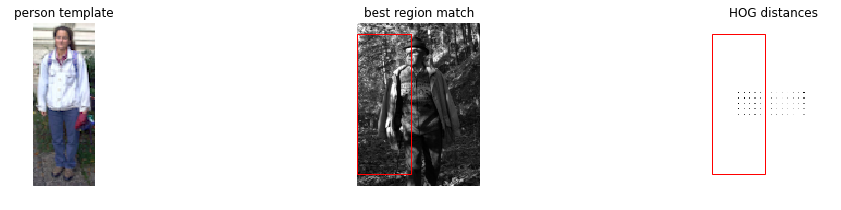

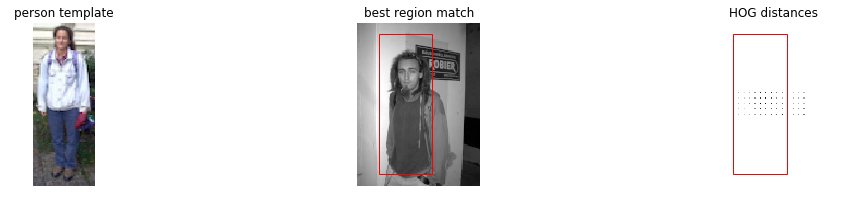

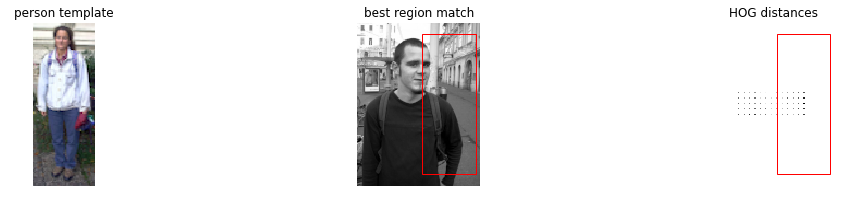

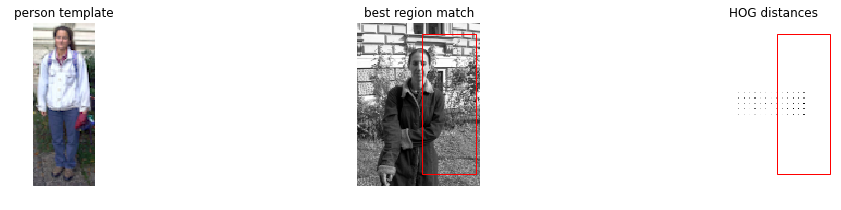

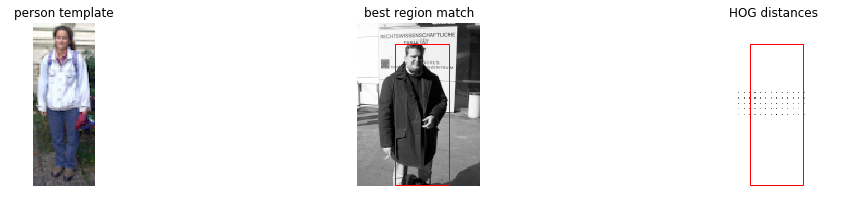

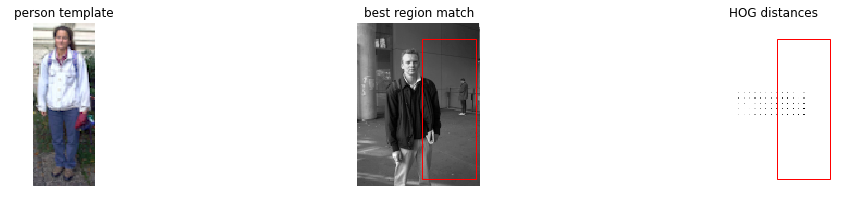

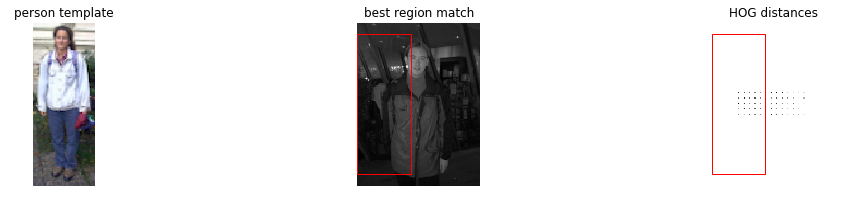

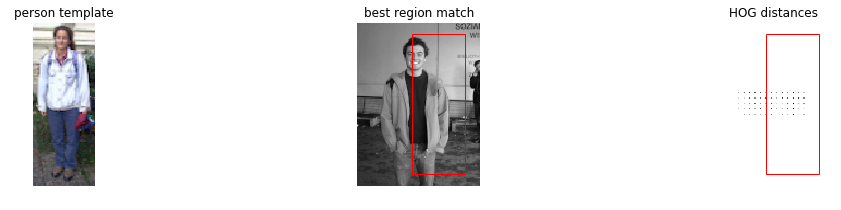

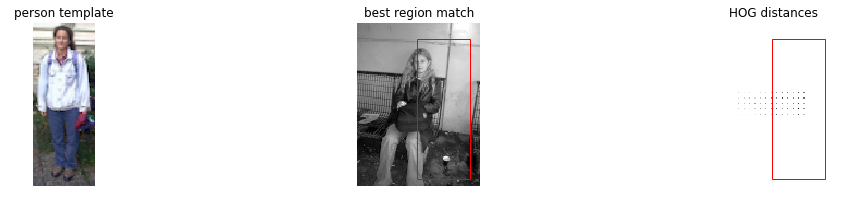

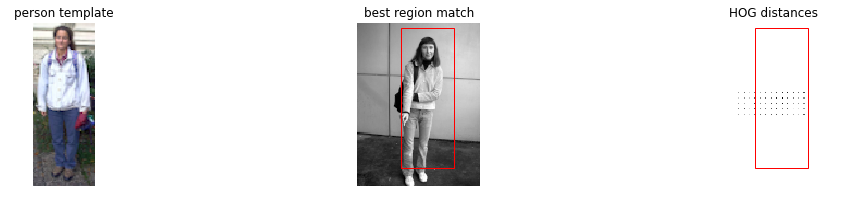

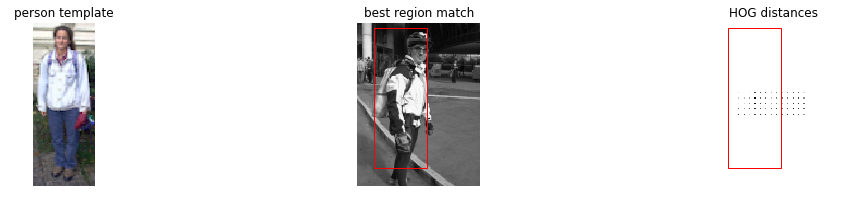

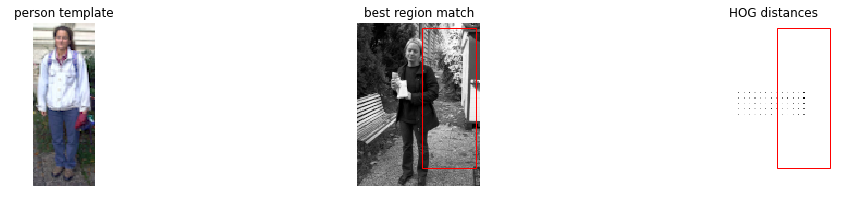

In [55]:
# Let's try with smaller numbers
 
# Changes    
fd_person, hog_person = hog(person_template, orientations=4, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=True)
hperson = person_template.shape[0]
wperson = person_template.shape[1]

people = io.collection.ImageCollection('images/TestPersonImages/*.bmp')
        
for im in people:
    
    im = rgb2gray(im)
    
    im_result=np.zeros((im.shape))
    im_result2=np.ones((im.shape))*np.inf
    height = im.shape[0]
    width=im.shape[1]

    for i in range(0,height-hperson,5):
        for j in range(0,width-wperson,5):
            region = im[i:i+hperson, j:j+wperson]
            
            # Changes
            fd_region, hog_region = hog(region, orientations=4, pixels_per_cell=(2, 2), 
                                        cells_per_block=(1, 1), visualize=True)

            im_result[i+round(hperson/2),j+round(wperson/2)]=np.dot(fd_person,fd_region)
            im_result2[i+round(hperson/2),j+round(wperson/2)]=np.linalg.norm(fd_person-fd_region)

    ij = np.unravel_index(np.argmax(im_result), im_result.shape)
    pos_x = ij[::-1][0]
    pos_y = ij[::-1][1]
    ij2 = np.unravel_index(np.argmin(im_result2), im_result.shape)
    pos_x2 = ij2[::-1][0] 
    pos_y2 = ij2[::-1][1]

    visualize_people(person_template, im, im_result2,  pos_x2,  pos_y2,  wperson, hperson)


*R:* As we can see, the algorithm improve in both situations, but in the first one seems to be even better, maybe because of the increase in the orientations, wich provides precition to the result. 

Comment the object detection process:
* Please, explain briefly the algorithm, including advantages and disadvantage
* Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

*R:* The hog descriptor is based on the gradient of the image, wich is a vector formed by partial derivatives in x and y of the image. The gradient has two features; the magnitude and the orientation. The algorithm computes the hole orientations of each block of pixels of the image with the arctan of the vector. Then, it makes a graphic for every orientation value and sum all the magnitude values for every orientation. Finaly, it closes the graphic in orther to make it circular. So, we have an image wich shows the more important orientations for each block of pixels, so we can do the same to other images and compare each other to meet the objective: to detect objects (or people in this case).
The principal advantage is the independence of the template variance. Maybe, this algorithm is slower than template-based object detection, but unlike it, variations on the scale and rotation of the template does not affect the bject detection. Instead, sum of squared differences, correlation, zero-mean correlation, or normalized correlation, are sensitive to illumination chances or  to mask and image values, as we have been able to see.  